In [122]:
using Pkg 
Pkg.add("FFTW")
using FFTW
using Plots

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
Precompiling project...
    610.3 ms  ? ComplexDiff
   Resolving package versions...
   Installed AxisArrays ────────────────── v0.4.7
   Installed ImageIO ───────────────────── v0.6.9
   Installed JpegTurbo ─────────────────── v0.1.5
   Installed TiffImages ────────────────── v0.11.3
   Installed StatsFuns ─────────────────── v1.3.2
   Installed AdaptivePredicates ────────── v1.2.0
   Installed PNGFiles ──────────────────── v0.4.3
   Installed HypergeometricFunctions ───── v0.3.27
   Installed PDMats ────────────────────── v0.11.32
   Installed EarCut_jll ────────────────── v2.2.4+0
   Installed Sixel ─────────────────────── v0.1.3
   Installed ProgressMeter ─────────────── v1.10.2
   Installed OpenEXR ───────────────────── v0.3.3
   Installed EnumX ─────────────────────── v1.0.4
   Installed CEnum ─────────────────────── v0.5.0
   Ins

In [2]:
# Suma en Julia
sum(cos(i) for i in 1:100)

-0.5322886082303911

In [3]:
function derivada(f,x)                  #Definimos una función usando la paquetería ForwardDiff para derivar.
    ForwardDiff.derivative(f,x)
end
x1 = -5.0:0.01:5
A = 5^2
N_Eigenvalores = 10
X = zeros(N_Eigenvalores)
Y = zeros(2*N_Eigenvalores);
length(Y)

20

In [4]:
c = 0.01
function difprog(f1,x_k)
    x_k1 = x_k +c
    h = x_k1-x_k 
    return (f1(x_k1)-f1(x_k))/h
end

difprog (generic function with 1 method)

In [7]:
j = 1000
xlm = 1:1:j
f2(x) = x^2 + 4
function guess(f2,h5)
    X4 = zeros(j)
    x = 1.3 + h5
    for i in 1:j
        xn = x - f2(x)/difprog(f2,x)
        x = xn
        X4[i] = xn 
    end
    return X4
end

guess (generic function with 1 method)

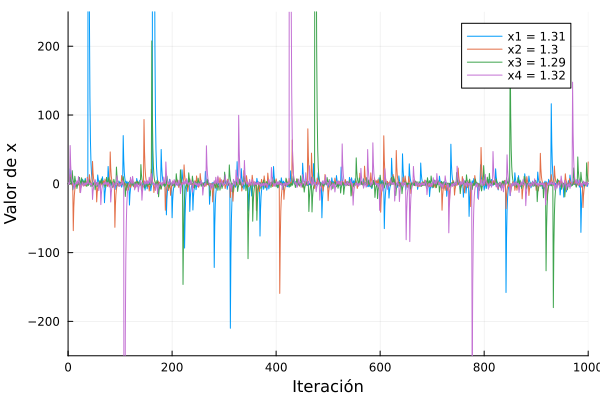

In [13]:
plot(xlm,guess(f2,0.01),xlabel = "Iteración",ylabel = "Valor de x",label = "x1 = 1.31", xlims = (0,1000), ylims= (-250,250))
plot!(xlm,guess(f2,0), label = "x2 = 1.3")
plot!(xlm,guess(f2,-0.01), label = "x3 = 1.29" )
plot!(xlm,guess(f2,0.02), label = "x4 = 1.32")

In [14]:
gprime(x) = (x^2 + 4)/(2x^2)

gprime (generic function with 1 method)

In [15]:
n10 = j  #Exponente de Lyaponov
lambda = 1/n10 * sum(log(abs((gprime(guess(f2,0.01)[i])))) for i in 1:n10)

0.6913414416421055

In [16]:
lambda1 = 1/n10 * sum(log(abs(gprime((guess(f2,0)[i])))) for i in 1:n10)

0.6976559019436214

In [17]:
lambda2 = 1/n10 * sum(log(abs(gprime((guess(f2,-0.01)[i])))) for i in 1:n10-1)

0.6925974978560289

In [90]:
log(2)

0.6931471805599453

In [18]:
A1 = fft(guess(f2,0.01));

In [19]:
A1cuad = abs.(A1).^2;

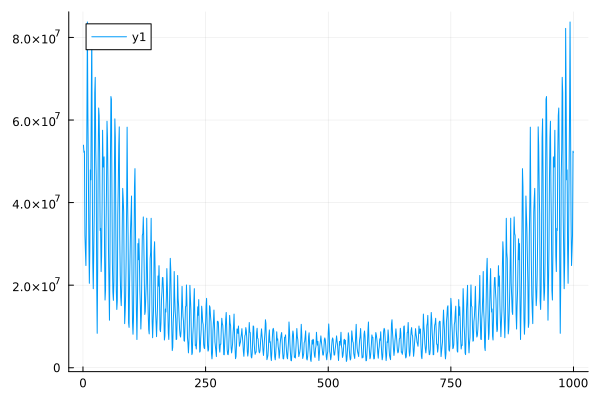

In [129]:
plot(xlm,A1cuad) # Es posible camiar los 1000 puntos por una frecuencia con una fórmula 

# ¿El espectro de potencias es denso? El sistema tiene órbitas densas (Es el término técnico)

In [21]:
f(x) = x^4 + 4
n = 200 #IteracionesMax
tol = 0.00001 #Tolerancia
g(x) = 4x^3 # Derivada de la función

function find(f,x)
    k=0
    F = f(x) # Función evaluada en el First Guess
    if F == 0 
        print("La raíz es $x")
    else 
        while tol < abs(F) && k < n
            xi = x - f(x)/g(x)
            x = xi
            F = f(x)
            k = k+1
        end
        if abs(F) > tol
            print("No se pudo encontrar la raíz en $n iteraciones")
        else
            print("La raíz es $x, raíz encontrada en $k iteraciones")
        end
    end 
    return x
end

find (generic function with 1 method)

In [24]:
B = find(f,-0.5+1.3im)

La raíz es -1.000000000006653 + 0.9999999999961595im, raíz encontrada en 6 iteraciones

-1.000000000006653 + 0.9999999999961595im

In [29]:
round(imag(B))

1.0

In [2]:
# Iteración de Muchas Condiciones Iniciales a la Vez 

iniciales = [x+y*im for x in -1:0.001:1, y in -1:0.001:1];

In [ ]:
f12(x) = x - (x^4 + 4)/(4*x^3)
iterator = deepcopy(iniciales)
[iterator .= f12.(iterator) for i in 1:100] #One Liner
iterator
Etiqueta = deepcopy(iterator)

In [346]:
N = length(Etiqueta)
eps = 0.00001
function Etiquetador(Etiqueta)
    for i in 1:N 
        if abs(Etiqueta[i] - (-1-1im)) <eps
            Etiqueta[i] = 1
        elseif abs(Etiqueta[i] -(-1+1im)) < eps
            Etiqueta[i] = 2
        elseif abs(Etiqueta[i] - (1-1im)) < eps
            Etiqueta[i] = 3
        elseif abs(Etiqueta[i] - (1+1im)) < eps
            Etiqueta[i] = 4
        else
            Etiqueta[i] = 0
        end
    end
    return Etiqueta
end
Raiz = real(Etiquetador(Etiqueta))

2001×2001 Matrix{Float64}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  2.0  2.0  2.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  2.0  2.0  2.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 ⋮                        ⋮              ⋱       ⋮                        ⋮
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     4.0  4.0  4.0  4.0  4.0  4.0  4.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0

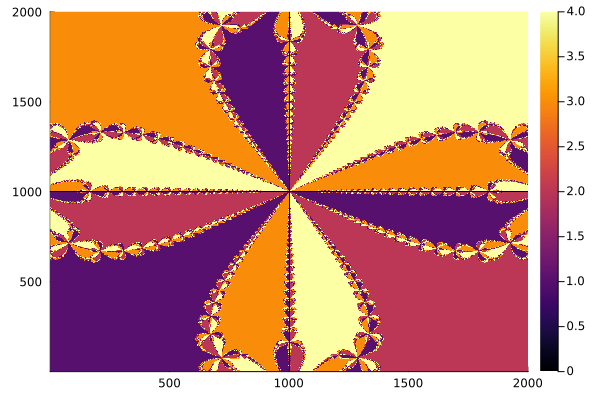

In [347]:
X1 = real(iniciales)
Y1 = imag(iniciales)
heatmap(Raiz)#,c=:viridis)

In [175]:
findall(x -> x == -1.0,Raiz)

CartesianIndex{2}[]

In [220]:
Raiz[2]

1.0

### Para $x^4 -4$ 

In [375]:
f22(x) = x - (x^4 - 4)/(4*x^3)
iterator1 = deepcopy(iniciales)
[iterator1 .= f22.(iterator1) for i in 1:100] #One Liner
iterator1
Etiqueta1 = deepcopy(iterator1)

2001×2001 Matrix{ComplexF64}:
 -2635.56-2635.56im       0.0+1.41421im  …  -2635.56+2635.56im
  1.41421+0.0im       9.70012+9.70012im      1.41421+0.0im
      0.0-1.41421im   1.41421+0.0im              0.0+1.41421im
      0.0-1.41421im       0.0+1.41421im          0.0+1.41421im
 -1.41421+0.0im      -1.41421+0.0im         -1.41421+0.0im
      0.0+1.41421im       0.0+1.41421im  …       0.0-1.41421im
      0.0+1.41421im       0.0+1.41421im          0.0-1.41421im
      0.0+1.41421im       0.0-1.41421im          0.0-1.41421im
      0.0+1.41421im   1.41421+0.0im              0.0-1.41421im
      0.0+1.41421im   1.41421+0.0im              0.0-1.41421im
         ⋮                               ⋱          ⋮
      0.0+1.41421im  -1.41421+0.0im              0.0-1.41421im
      0.0+1.41421im       0.0-1.41421im          0.0-1.41421im
      0.0+1.41421im       0.0+1.41421im          0.0-1.41421im
      0.0+1.41421im       0.0+1.41421im  …       0.0-1.41421im
  1.41421+0.0im       1.41421+0.0im       

In [376]:
N1 = length(Etiqueta1)
eps1 = 0.0001
function Etiquetador2(Etiqueta1)
    for i in 1:N1 
        if abs(Etiqueta1[i] - (sqrt(2))) <eps1
            Etiqueta1[i] = 1
        elseif abs(Etiqueta1[i] -(-sqrt(2))) < eps1
            Etiqueta1[i] = 2
        elseif abs(Etiqueta1[i] - (sqrt(2)im)) < eps1
            Etiqueta1[i] = 3
        elseif abs(Etiqueta1[i] - (-sqrt(2)im)) < eps1
            Etiqueta1[i] = 4
        else
            Etiqueta1[i] = 0
        end
    end
    return Etiqueta1
end

Raiz2 = real(Etiquetador2(Etiqueta1))

2001×2001 Matrix{Float64}:
 0.0  3.0  2.0  2.0  4.0  1.0  1.0  1.0  …  1.0  1.0  3.0  2.0  2.0  4.0  0.0
 1.0  0.0  3.0  1.0  4.0  1.0  1.0  2.0     1.0  1.0  3.0  1.0  4.0  0.0  1.0
 4.0  1.0  0.0  4.0  1.0  3.0  3.0  3.0     4.0  4.0  1.0  3.0  0.0  1.0  3.0
 4.0  3.0  2.0  0.0  3.0  3.0  3.0  3.0     4.0  4.0  4.0  0.0  2.0  4.0  3.0
 2.0  2.0  3.0  1.0  0.0  2.0  2.0  2.0     2.0  2.0  0.0  1.0  4.0  2.0  2.0
 3.0  3.0  1.0  1.0  4.0  0.0  2.0  2.0  …  2.0  0.0  3.0  1.0  1.0  4.0  4.0
 3.0  3.0  1.0  1.0  4.0  4.0  0.0  2.0     0.0  3.0  3.0  1.0  1.0  4.0  4.0
 3.0  4.0  1.0  1.0  4.0  4.0  4.0  0.0     3.0  3.0  3.0  1.0  1.0  3.0  4.0
 3.0  1.0  1.0  1.0  4.0  4.0  4.0  4.0     3.0  3.0  3.0  1.0  1.0  1.0  4.0
 3.0  1.0  1.0  1.0  4.0  4.0  4.0  4.0     3.0  3.0  3.0  1.0  1.0  1.0  4.0
 ⋮                        ⋮              ⋱       ⋮                        ⋮
 3.0  2.0  2.0  2.0  4.0  4.0  4.0  4.0     3.0  3.0  3.0  2.0  2.0  2.0  4.0
 3.0  4.0  2.0  2.0  4.0  4.0  4.0  0.0

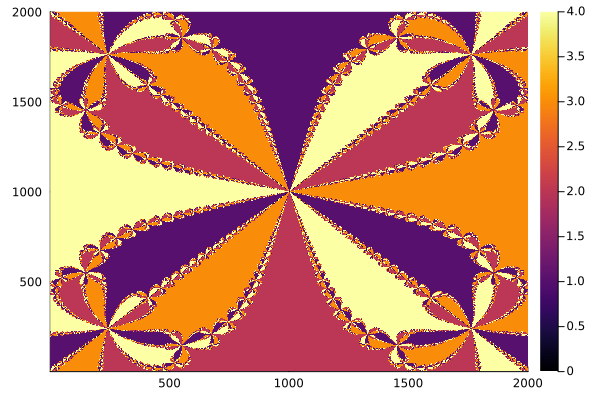

In [377]:
heatmap(Raiz2)

1.4142135623730951